In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 

from sklearn.metrics import roc_auc_score, precision_score, \
    recall_score, f1_score, log_loss, confusion_matrix

import yaml

import warnings
warnings.filterwarnings("ignore")

# Описание задачи

https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset


Набор данных содержит информацию от 2149 пациентов: демографические данные, факторы образа жизни, историю болезни, клинические измерения, когнитивные и функциональные оценки, симптомы и диагноз болезни Альцгеймера. 

**Target:** Diagnisis (1 - есть болезнь Альцгеймера, 0 - нет болезни Альцгеймера)

**Patient ID:**
- PatientID: уникальный идентификатор пациента

**Демографические данные:**
- Age: возраст пациентов (от 60 до 90 лет)
- Gender: пол пациентов (0 - мужской пол, 1 - женский пол)
- Ethniсity: этническая принадлежность пациентов, кодируемая следующим образом:
0: европеоидная, 1: афроамериканская, 2: азиатская, 3: другая
- Уровень образования пациентов, кодируется следующим образом:
0: Никакого образования, 1: Среднее образование, 2: Бакалавр, 3: Выше бакалавра

**Факторы образа жизни:**
- BMI: индекс массы тела пациентов, от 15 до 40
- Smoking: статус курения, где 0 означает «нет», а 1 означает «да»
- AlcoholConsumption: еженедельное потребление алкоголя в единицах, от 0 до 20
- ФPhysicalActivity: еженедельная физическая активность в часах, от 0 до 10
- DietQuality: показатель качества диеты, от 0 до 10
- SleepQuality: показатель качества сна, от 4 до 10

**Медицинский анамнез:**
- FamilyHistoryAlzheimers: семейный анамнез болезни Альцгеймера, где 0 означает «нет», а 1 означает «да»
- CardiovascularDisease: наличие сердечно-сосудистых заболеваний (0 - «нет», 1 - «да»)
- Diabetes: наличие диабета (0 - «нет», 1 - «да»)
- Depression: наличие депрессии (0 - «нет», 1 - «да»)
- HeadInjury: история черепно-мозговой травмы (0 - «нет», 1 - «да»)
- Hypertension: наличие гипертонии (0 - «нет», 1 - «да»)

**Клинические измерения:**
- SystolicBP: систолическое артериальное давление в диапазоне от 90 до 180 мм рт. ст.
- DiastolicBP: диастолическое артериальное давление в диапазоне от 60 до 120 мм рт. ст.
- CholesterolTotal: общий уровень холестерина в диапазоне от 150 до 300 мг/дл.
- CholesterolLDL: уровень холестерина липопротеинов низкой плотности в диапазоне от 50 до 200 мг/дл.
- CholesterolHDL: уровень холестерина липопротеинов высокой плотности в диапазоне от 20 до 100 мг/дл.
- CholesterolTriglycerides: уровень триглицеридов в диапазоне от 50 до 400 мг/дл.

**Когнитивные и функциональные оценки:**
- MMSE: оценка по краткой шкале оценки психического состояния, от 0 до 30. Более низкие баллы указывают на когнитивные нарушения.
- FunctionalAssessment: функциональная оценка, от 0 до 10. Более низкие баллы указывают на более серьезные нарушения.
- MemoryComplaints: наличие жалоб на память, где 0 означает «нет», а 1 означает «да».
- BehavioralProblems: наличие поведенческих нарушений (0 - «нет», 1 - «да»)
- ADL: оценка активности повседневной жизни, от 0 до 10. Более низкие баллы указывают на более серьезные нарушения.

**Симптомы:**
- Confusion: Наличие спутанности сознания, где 0 означает «Нет», а 1 означает «Да».
- Disorientation: Наличие дезориентации (0 - «нет», 1 - «да»)
- PersonalityChanges: Наличие изменений личности (0 - «нет», 1 - «да»)
- DifficultyCompletingTasks: Наличие трудностей с выполнением задач (0 - «нет», 1 - «да»)
- Forgetfulness: Наличие забывчивости (0 - «нет», 1 - «да»)

**Конфиденциальная информация:**
- DoctorInCharge: этот столбец содержит конфиденциальную информацию о лечащем враче, где для всех пациентов указано значение «XXXConfid».

In [17]:
config_path = '../config/params.yaml'

config = yaml.load(open(config_path), Loader=yaml.FullLoader)

preproc = config['preprocessing']

In [18]:
preproc

{'drop_columns': ['PatientID',
  'DoctorInCharge',
  'BMI',
  'AlcoholConsumption',
  'PhysicalActivity',
  'DietQuality',
  'DiastolicBP',
  'CholesterolTotal',
  'CholesterolTriglycerides',
  'Gender',
  'EducationLevel',
  'Diabetes',
  'Disorientation',
  'Forgetfulness'],
 'map_change_columns': {'Ethnicity': {0: 'Caucasian',
   1: 'African American',
   2: 'Asian',
   3: 'Other'}},
 'one_hot_columns': ['Ethnicity'],
 'scale_columns': ['ADL',
  'Age',
  'CholesterolHDL',
  'CholesterolLDL',
  'FunctionalAssessment',
  'MMSE',
  'SleepQuality',
  'SystolicBP'],
 'passthrough_columns': ['BehavioralProblems',
  'CardiovascularDisease',
  'Confusion',
  'Depression',
  'DifficultyCompletingTasks',
  'FamilyHistoryAlzheimers',
  'HeadInjury',
  'Hypertension',
  'MemoryComplaints',
  'PersonalityChanges',
  'Smoking'],
 'raw_data_path': '../data/raw/alzheimers_disease_data.csv',
 'raw_train_path': '../data/raw/train.csv',
 'raw_test_path': '../data/raw/test.csv',
 'unique_values_path': 

In [19]:
preproc['raw_data_path']

'../data/raw/alzheimers_disease_data.csv'

In [20]:
df = pd.read_csv(preproc['raw_data_path'])
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [21]:
df.shape

(2149, 35)

In [22]:
df.isna().sum().sum() # в данных нет пропусков

0

In [23]:
# это предварительный шаг, который уже в сам пайплайн не включаем,
# как будто изначально были отдельно трейн и тест, на который нет ответов

train_df, test_df = train_test_split(df,
                                     test_size=preproc['test_size'],
                                     stratify=df[preproc['target_column']],
                                     random_state=preproc['random_state'])

train_df.to_csv(preproc['raw_train_path'], index=False)
test_df.drop(preproc['target_column'], axis=1).to_csv(preproc['raw_test_path'],
                                                      index=False)


In [24]:
train_df.head(2)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
780,5531,86,0,2,1,28.155961,0,18.629164,6.535593,1.316452,...,0,0,0.232938,0,0,0,0,1,0,XXXConfid
1341,6092,62,1,0,3,28.189210,1,7.763349,1.913491,6.023577,...,0,0,0.442326,0,0,0,0,0,0,XXXConfid


# EDA

In [26]:
# чтение тренировочных данных
data = pd.read_csv(preproc['raw_train_path'])
data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,5531,86,0,2,1,28.155961,0,18.629164,6.535593,1.316452,...,0,0,0.232938,0,0,0,0,1,0,XXXConfid
1,6092,62,1,0,3,28.189210,1,7.763349,1.913491,6.023577,...,0,0,0.442326,0,0,0,0,0,0,XXXConfid
2,5571,75,0,0,0,25.391526,0,8.449637,9.549369,1.774418,...,0,0,4.918146,0,0,0,0,0,1,XXXConfid
3,5608,89,0,0,0,23.581751,0,1.939227,1.322465,8.758693,...,1,0,5.157190,0,1,0,0,1,0,XXXConfid
4,5344,76,1,0,2,38.768590,1,9.013919,8.296794,7.892595,...,0,0,9.413984,0,0,0,0,1,0,XXXConfid


In [27]:
data.shape

(1719, 35)

In [28]:
data.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace=True)

In [30]:
data.describe()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,...,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000
mean,74.902269,0.504945,0.702734,1.286213,27.682707,0.292030,10.111128,4.907299,5.032795,7.045703,...,5.117266,0.205352,0.146015,4.978667,0.205352,0.153578,0.150669,0.158232,0.305992,0.353694
std,9.019884,0.500121,0.999155,0.900518,7.231141,0.454828,5.764060,2.851988,2.912318,1.767230,...,2.921750,0.404076,0.353224,2.960770,0.404076,0.360648,0.357830,0.365064,0.460960,0.478255
min,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,0.000000,0.000000,1.000000,21.623689,0.000000,5.198830,2.576288,2.491901,5.472445,...,2.553440,0.000000,0.000000,2.282878,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75.000000,1.000000,0.000000,1.000000,27.912082,0.000000,9.995192,4.733116,5.160431,7.117036,...,5.173891,0.000000,0.000000,5.026306,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83.000000,1.000000,1.000000,2.000000,33.854903,1.000000,15.255741,7.393688,7.578673,8.563230,...,7.647480,0.000000,0.000000,7.604333,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,90.000000,1.000000,3.000000,3.000000,39.988513,1.000000,19.989293,9.987429,9.998346,9.999840,...,9.992610,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1719 entries, 0 to 1718
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1719 non-null   int64  
 1   Gender                     1719 non-null   int64  
 2   Ethnicity                  1719 non-null   int64  
 3   EducationLevel             1719 non-null   int64  
 4   BMI                        1719 non-null   float64
 5   Smoking                    1719 non-null   int64  
 6   AlcoholConsumption         1719 non-null   float64
 7   PhysicalActivity           1719 non-null   float64
 8   DietQuality                1719 non-null   float64
 9   SleepQuality               1719 non-null   float64
 10  FamilyHistoryAlzheimers    1719 non-null   int64  
 11  CardiovascularDisease      1719 non-null   int64  
 12  Diabetes                   1719 non-null   int64  
 13  Depression                 1719 non-null   int64

In [32]:
data['Diagnosis'].value_counts(normalize=True)

Diagnosis
0    0.646306
1    0.353694
Name: proportion, dtype: float64

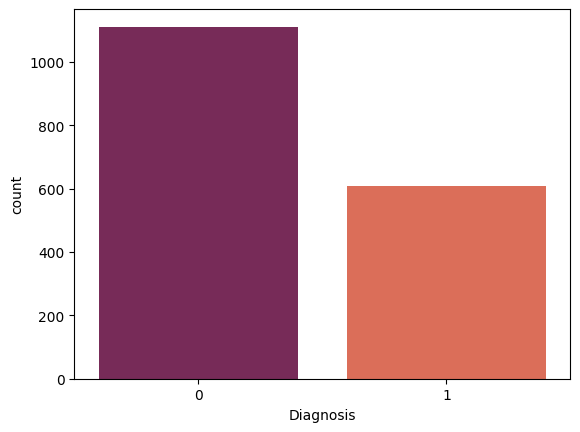

In [33]:
sns.countplot(data, x='Diagnosis', palette='rocket');
# есть дисбаланс классов

In [34]:
cat_cols = [col for col in data.columns if data[col].nunique() < 10][:-1]
num_cols = [col for col in data.columns if col not in cat_cols][:-1]

In [35]:
def kde_and_boxplots(data: pd.DataFrame, column: str, target: str) -> None:
    fig, axes = plt.subplots(ncols=2, figsize=(11, 6))
    sns.kdeplot(data, x=column, hue=target, palette='rocket', common_norm=False, ax=axes[0])
    sns.boxplot(data,
            y=column,
            x=target,
            legend=False,
            palette='rocket',
            hue=target,
            ax=axes[1])
    plt.suptitle(f'Распределение признака {column}');

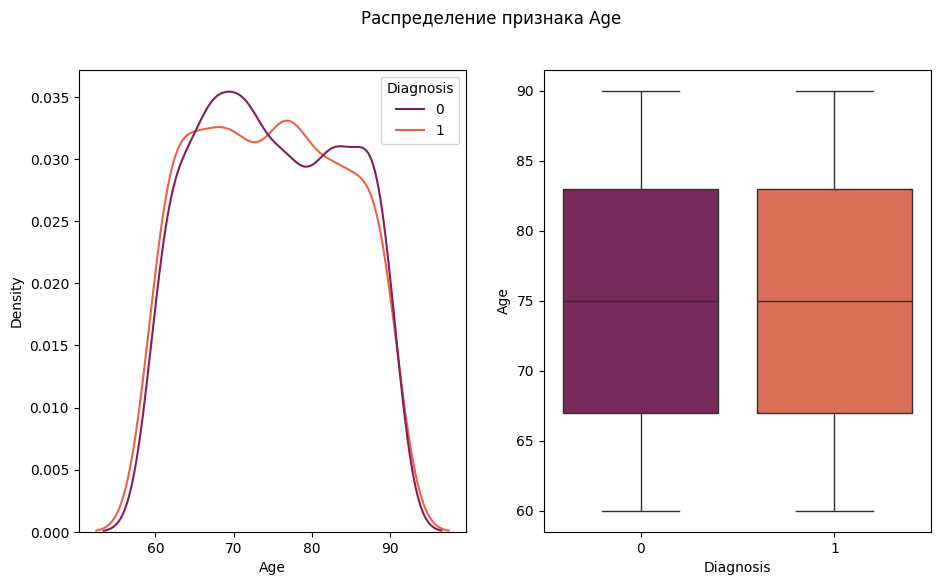

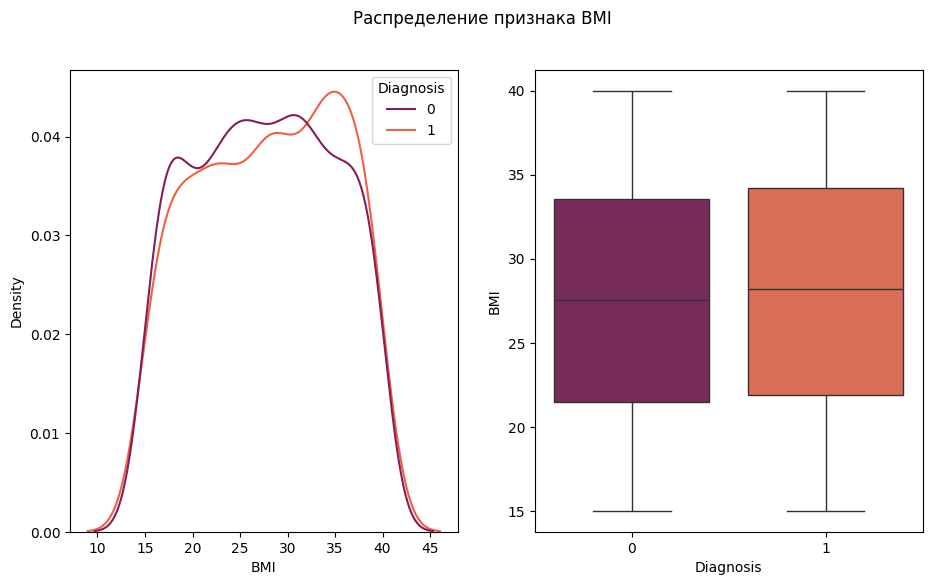

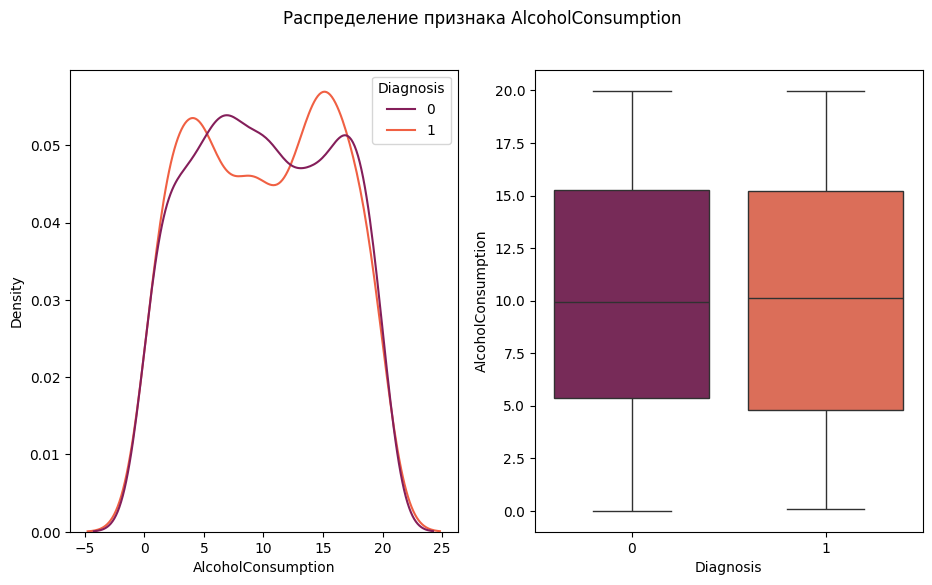

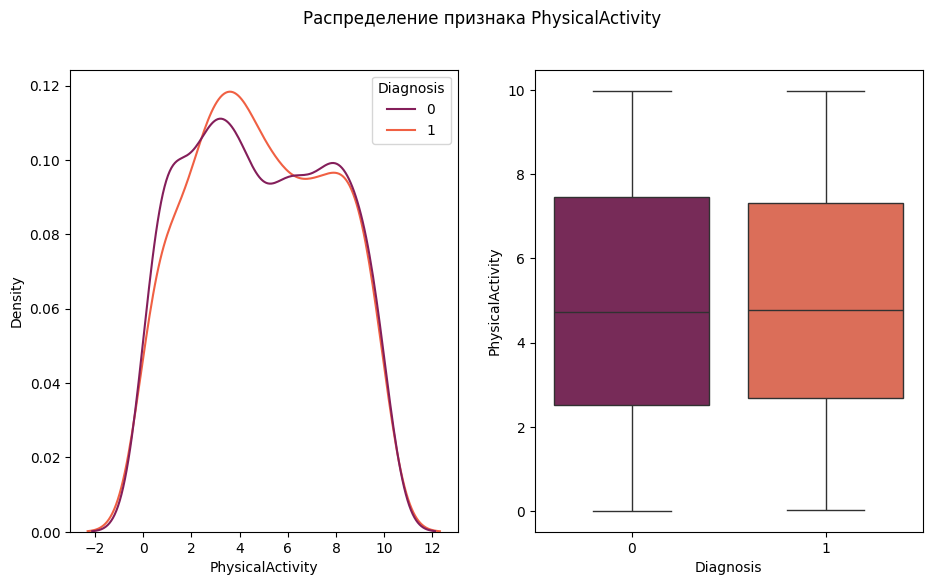

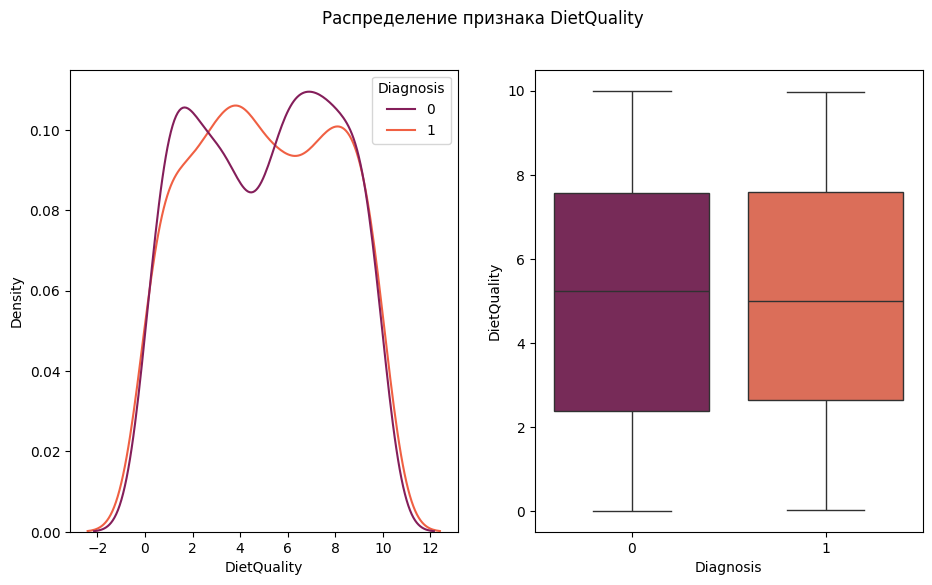

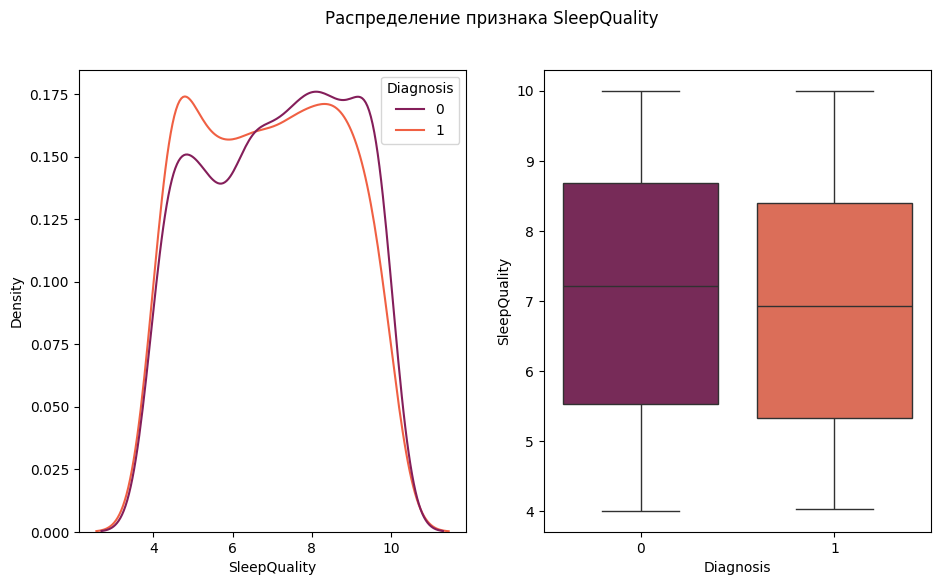

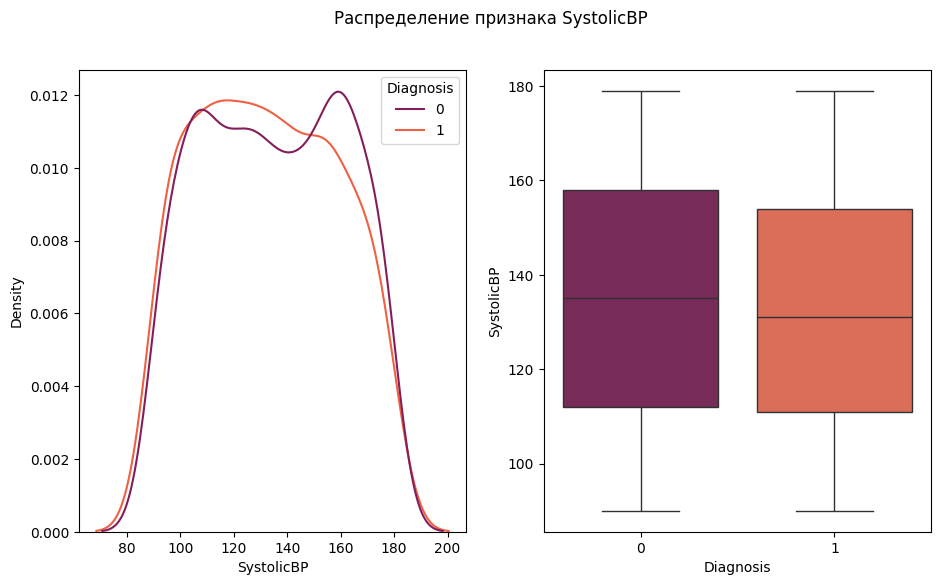

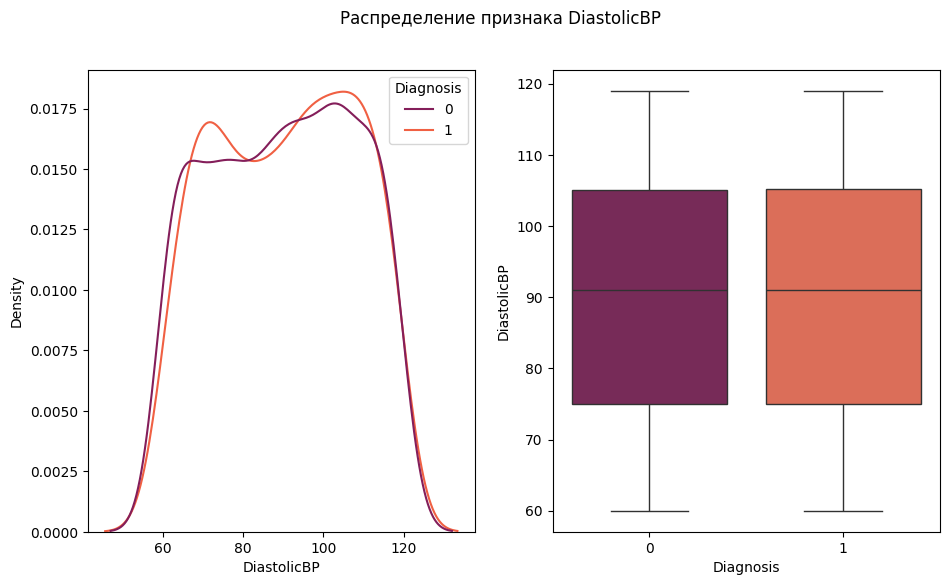

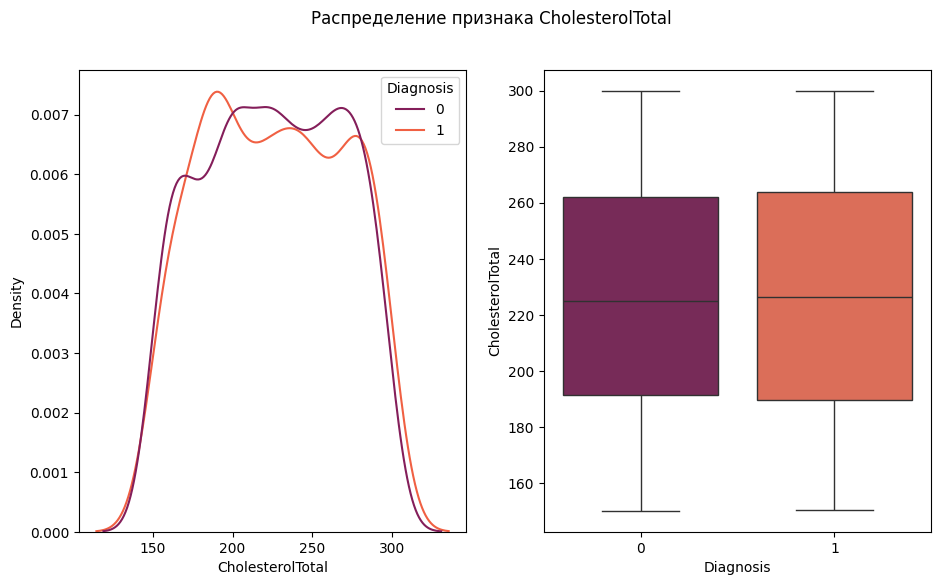

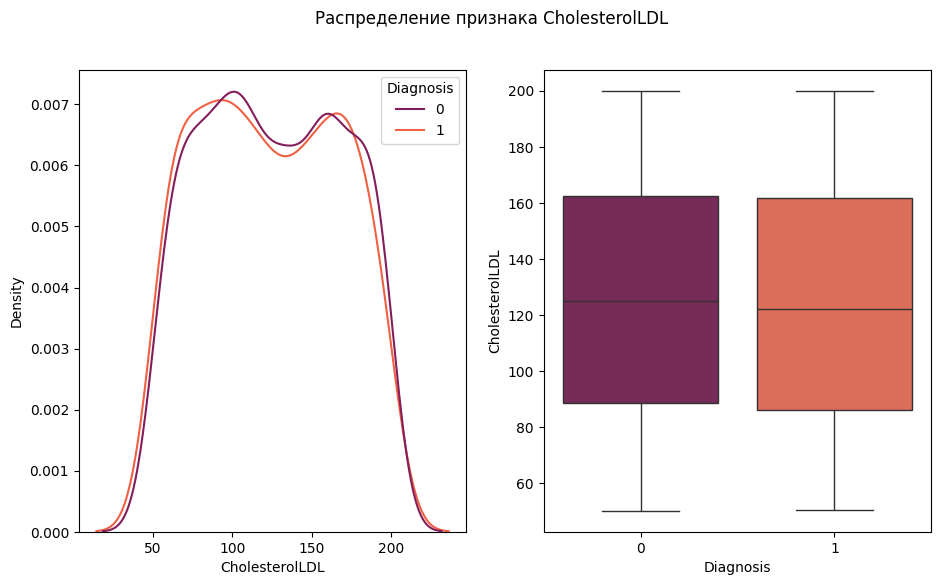

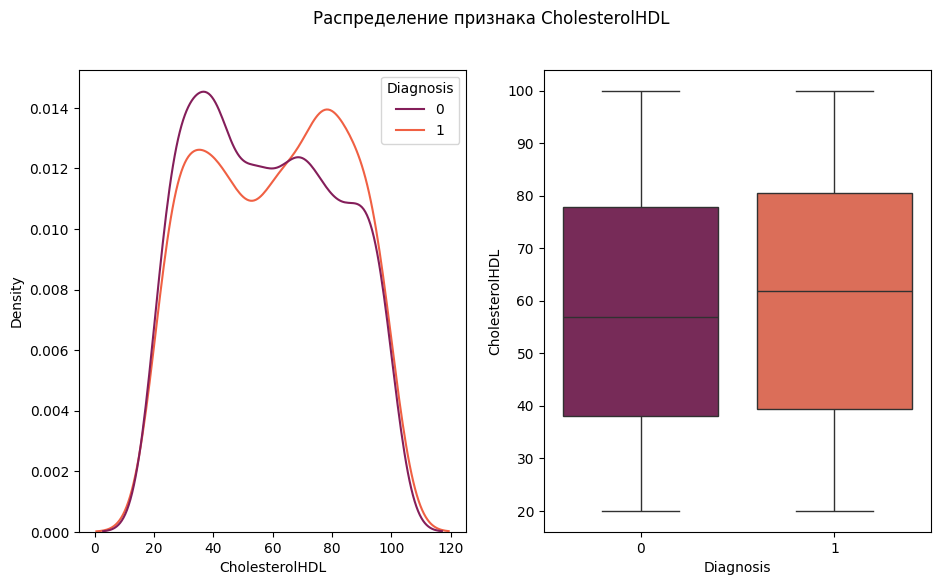

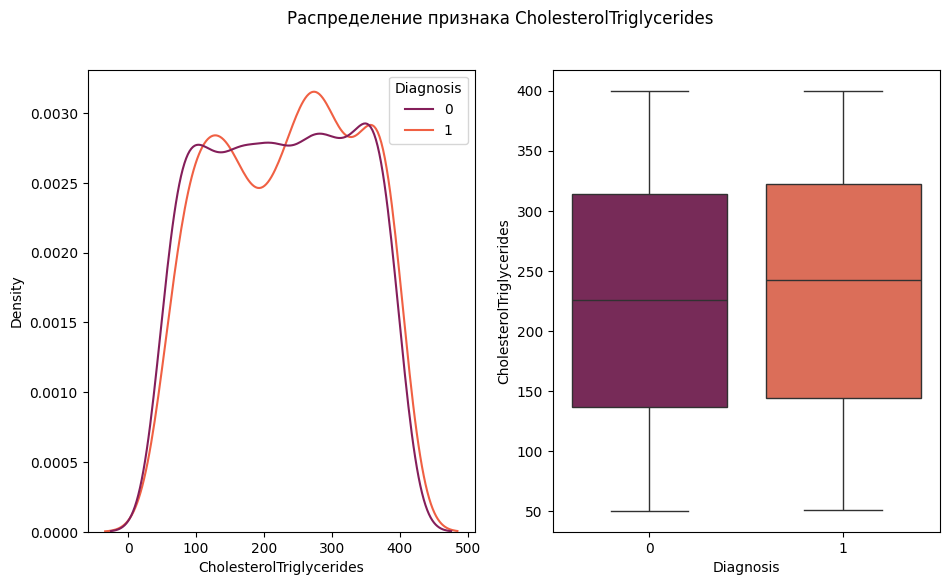

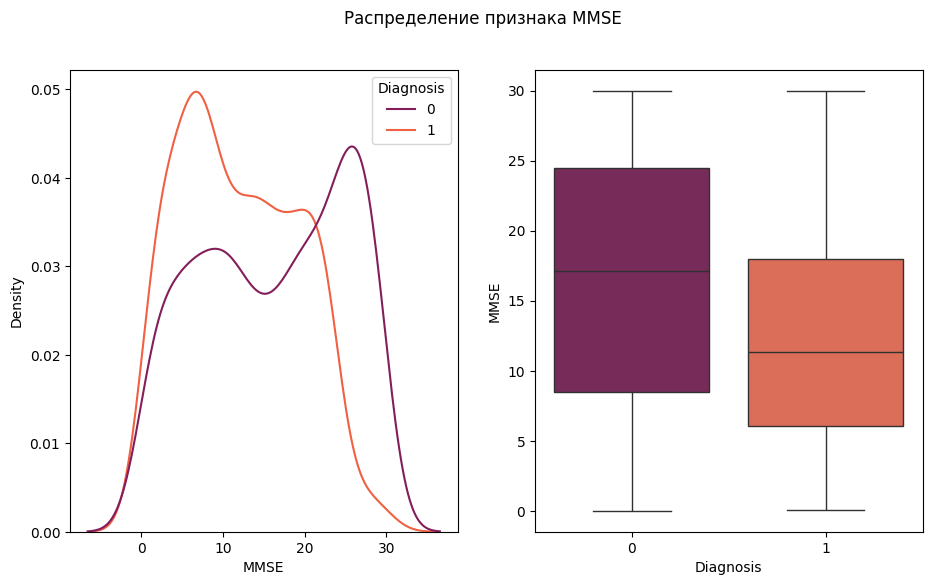

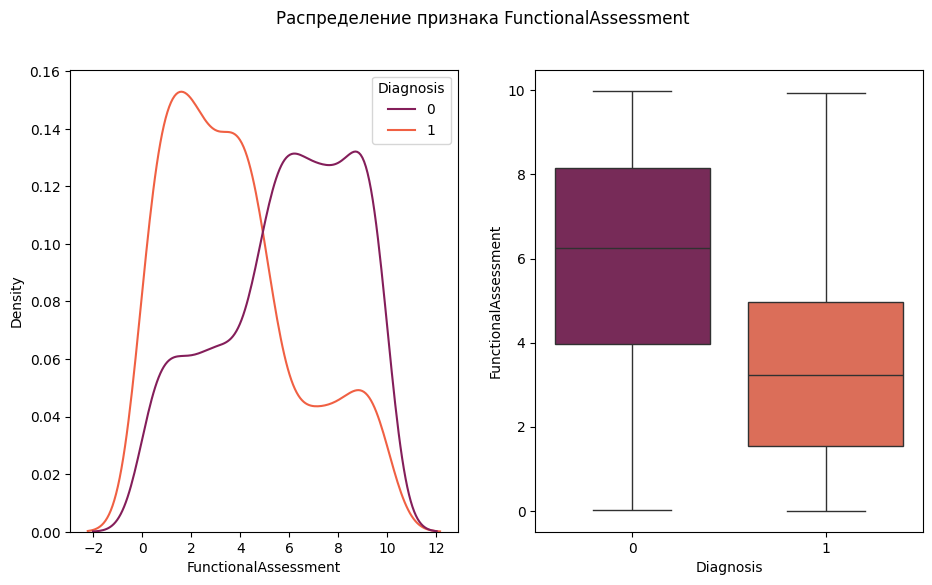

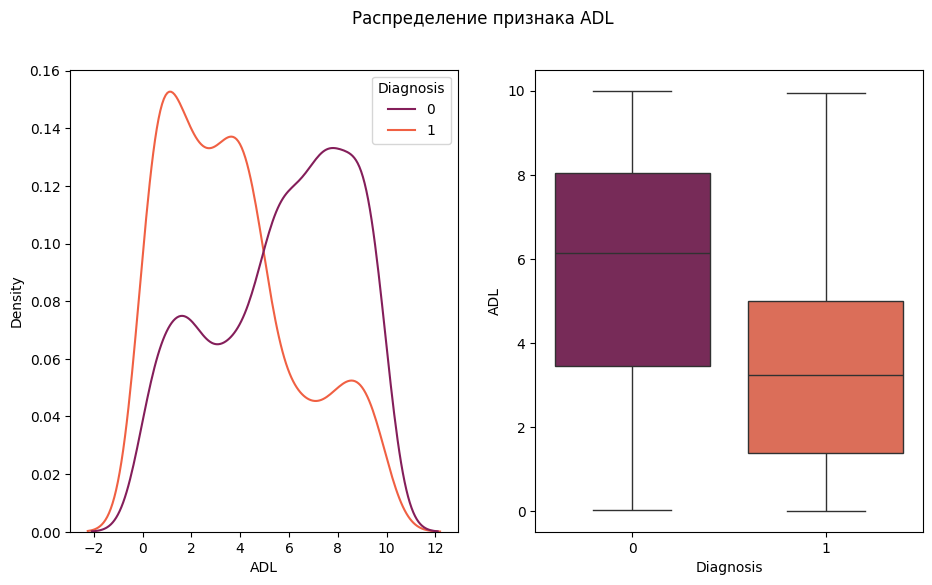

In [36]:
for col in num_cols:
    kde_and_boxplots(data=data, column=col, target='Diagnosis')

In [37]:
labels_for_plots = {
    'Gender': ['Male', 'Female'],
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'EducationLevel': ['None', 'High School', 'Bachelor\'s', 'Higher'],
    'Smoking': ['No', 'Yes'],
    'FamilyHistoryAlzheimers': ['No', 'Yes'],
    'CardiovascularDisease': ['No', 'Yes'],
    'Diabetes': ['No', 'Yes'],
    'Depression': ['No', 'Yes'],
    'HeadInjury': ['No', 'Yes'],
    'Hypertension': ['No', 'Yes'],
    'MemoryComplaints': ['No', 'Yes'],
    'BehavioralProblems': ['No', 'Yes'],
    'Confusion': ['No', 'Yes'],
    'Disorientation': ['No', 'Yes'],
    'PersonalityChanges': ['No', 'Yes'],
    'DifficultyCompletingTasks': ['No', 'Yes'],
    'Forgetfulness': ['No', 'Yes']
}

In [39]:
def barplot(data: pd.DataFrame, column: str, target: str, labels: dict) -> None:
    """
    Построение barplot с нормированными данными с выводом значений на графике
    """
    norm_target = df.groupby(target)[column].value_counts(
        normalize=True).mul(100).rename('percent').reset_index()
    plt.figure(figsize=(7, 6))
    ax = sns.barplot(data=norm_target,
                     x=column,
                     y='percent',
                     hue=target,
                     palette='crest')
    plt.xticks(ticks=range(len(labels[column])), labels=labels[column])
    plt.ylim((0, 100))
    for p in ax.patches:
        percentage = f"{p.get_height():.1f}%"
        ax.annotate(
            percentage,  # текст
            # координата xy
            (p.get_x() + p.get_width() / 2., p.get_height()),
            # центрирование
            ha='center',
            va='center',
            xytext=(0, 10),
            # точка смещения относительно координаты
            textcoords='offset points',
            fontsize=10)

    plt.xlabel(column, fontsize=12)
    plt.ylabel('Процент', fontsize=12)

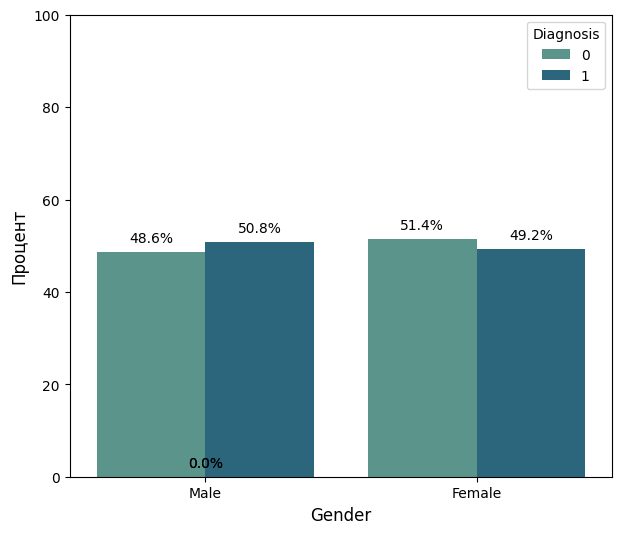

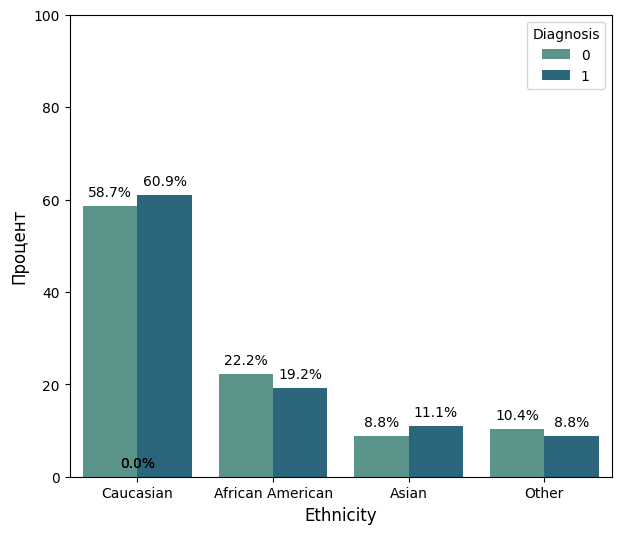

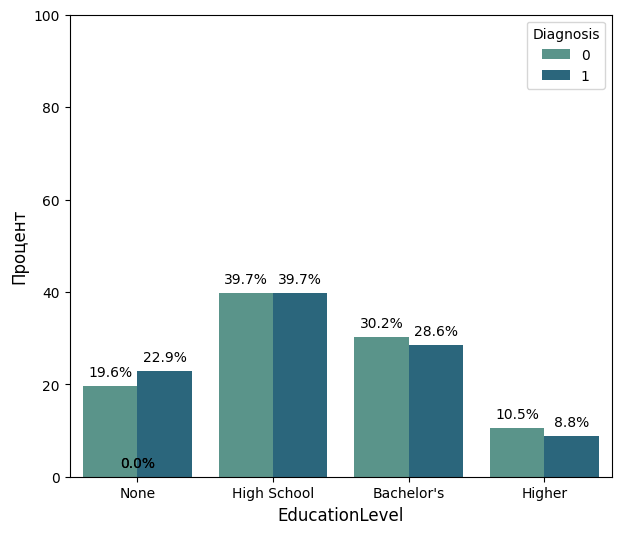

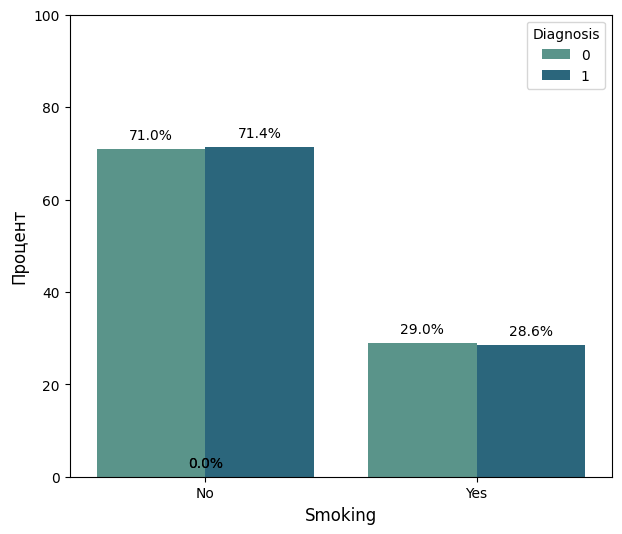

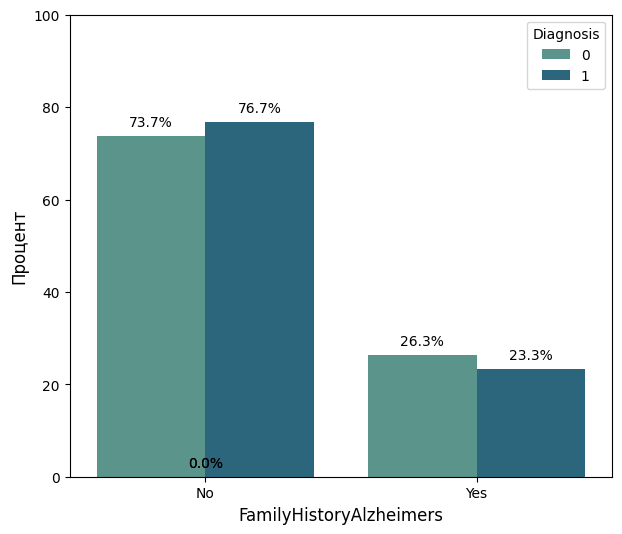

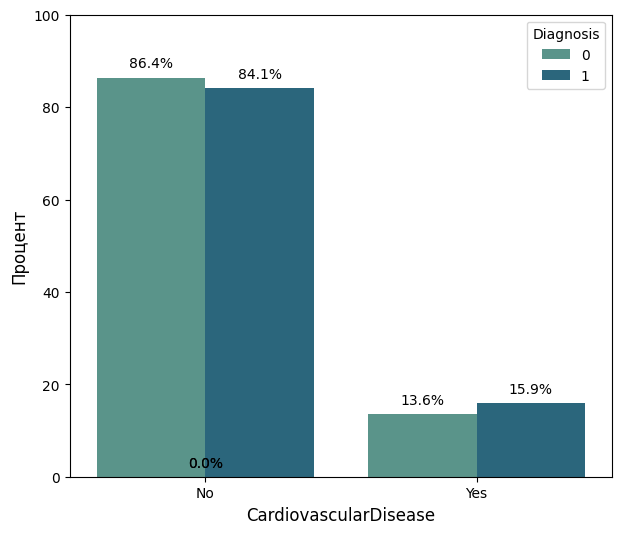

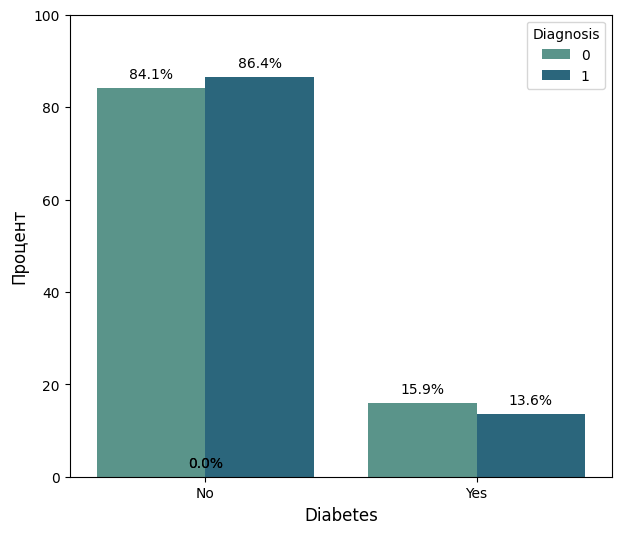

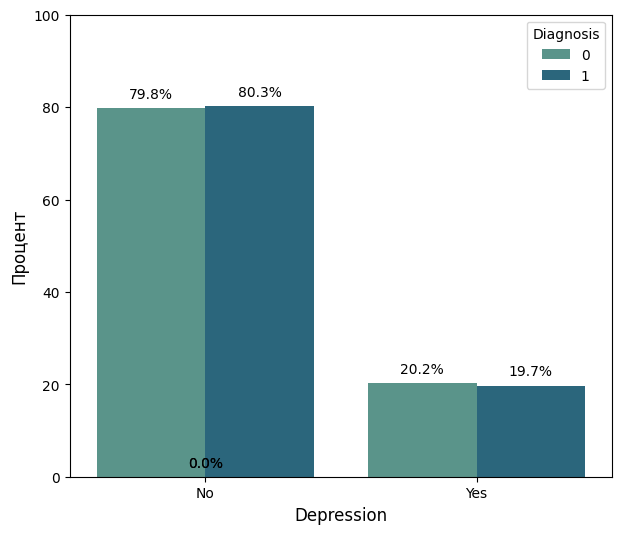

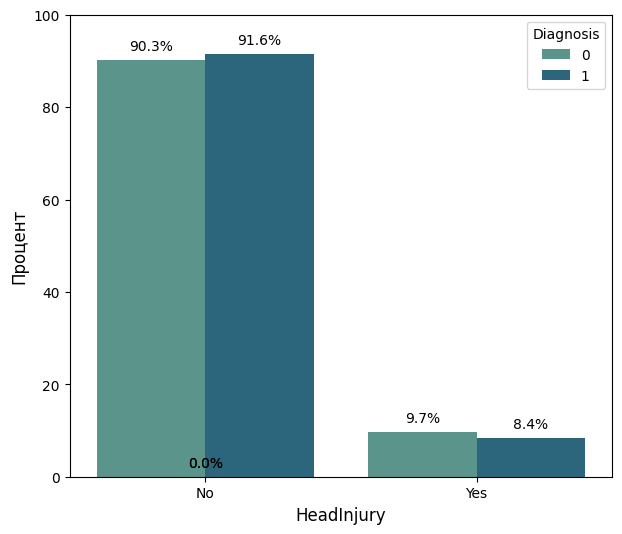

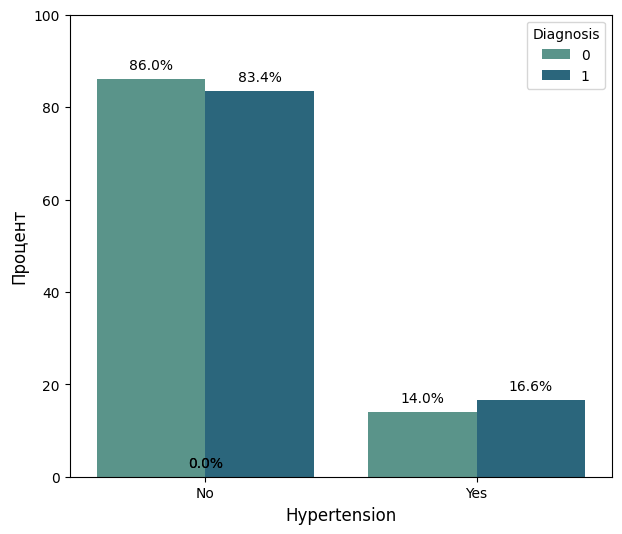

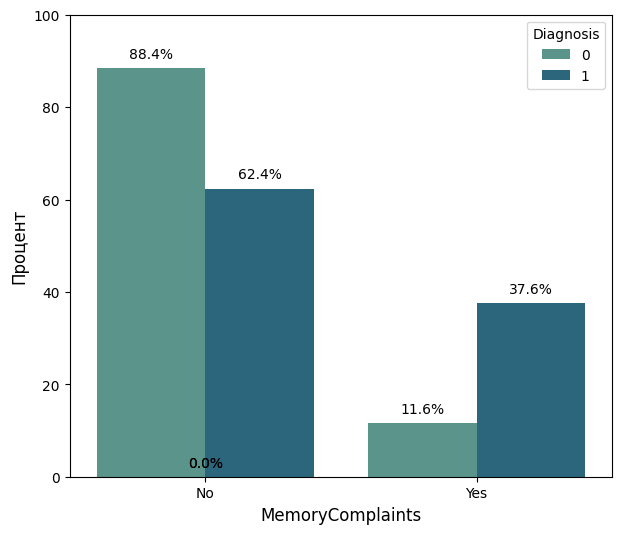

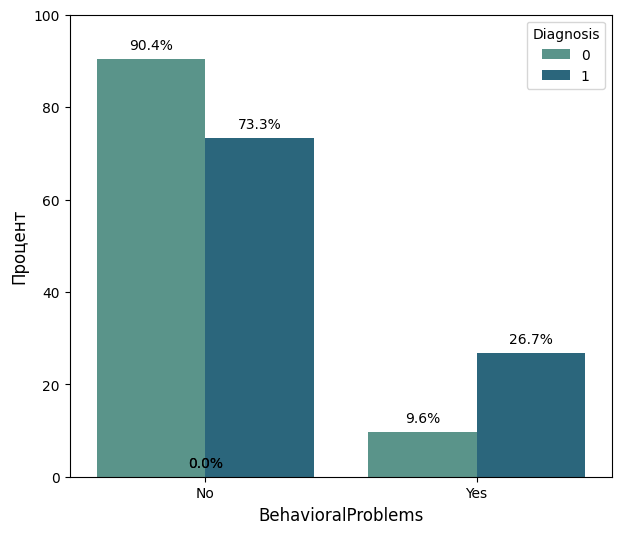

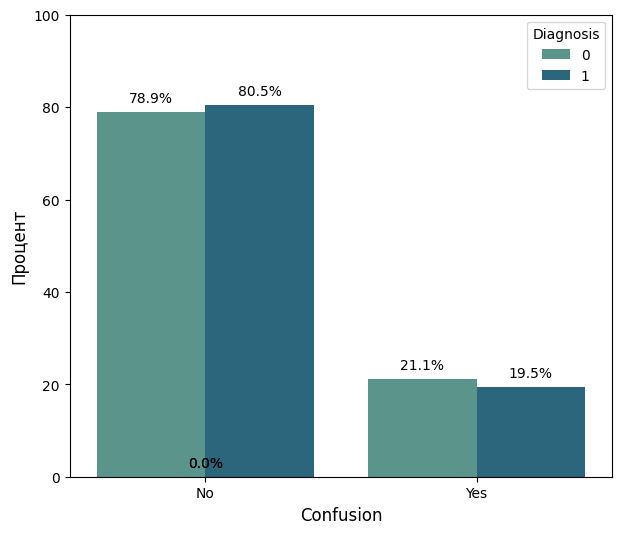

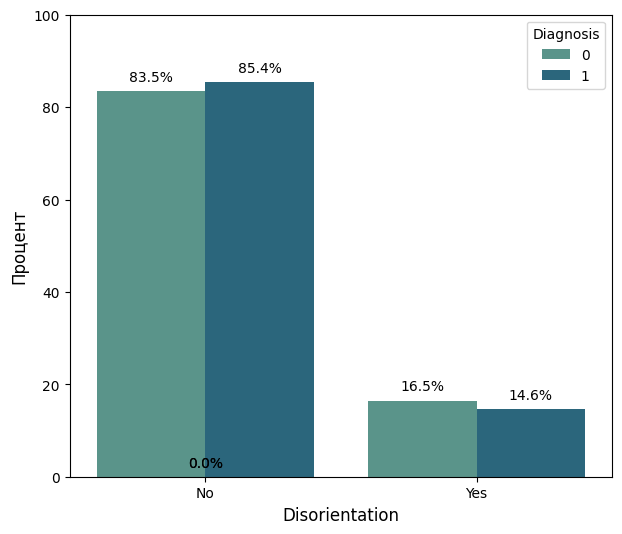

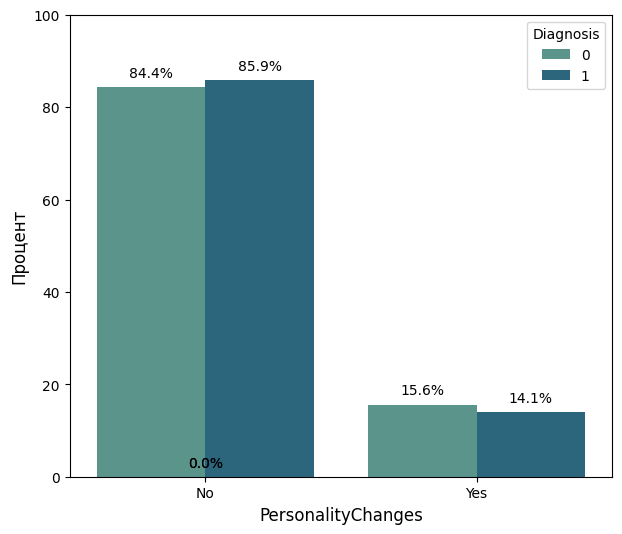

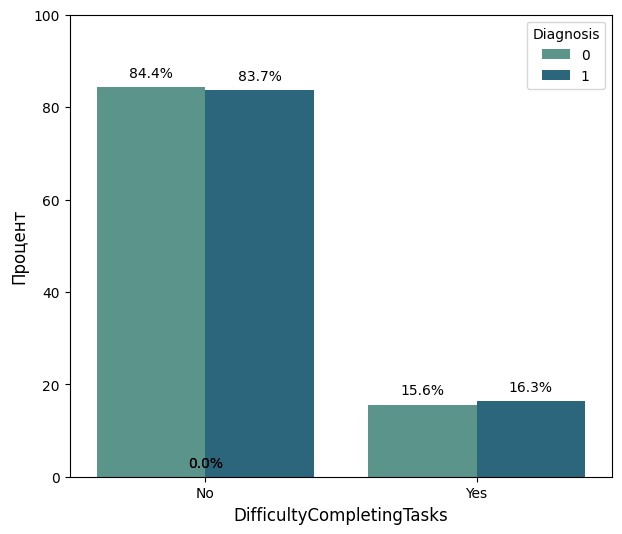

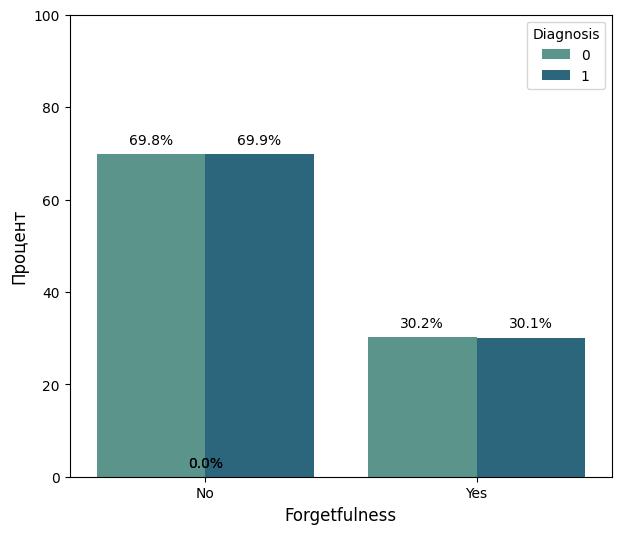

In [40]:
for col in cat_cols:
    barplot(data=data, column=col, target='Diagnosis', labels=labels_for_plots)

**Выводы:**
- Наиболее сильно в разрезе целевой переменной различаются признаки ADL, FunctionalAssesment, MMSE, MemoryComplaints, BehavioralProblems
- Также различаются признаки CholeseterolHDL, Systolic BP, SleepQuality
- Для многих признаков распределения и медианные значения практически не различаются в разрезе целевой переменной: лучше сделать отбор признаков

In [41]:
for col in cat_cols:
    print(f"{col}: {data[col].nunique()} categories")

Gender: 2 categories
Ethnicity: 4 categories
EducationLevel: 4 categories
Smoking: 2 categories
FamilyHistoryAlzheimers: 2 categories
CardiovascularDisease: 2 categories
Diabetes: 2 categories
Depression: 2 categories
HeadInjury: 2 categories
Hypertension: 2 categories
MemoryComplaints: 2 categories
BehavioralProblems: 2 categories
Confusion: 2 categories
Disorientation: 2 categories
PersonalityChanges: 2 categories
DifficultyCompletingTasks: 2 categories
Forgetfulness: 2 categories


В большинстве категориальных признаков две категории и они уже находятся в бинаризованном виде. В признаках Ethnicity и EducationLevel по 4 категории. Так как категории образования имеют логический порядок (один уровень образования выше другого), их можно оставить закодированными цифрами от 0 до 3. В случае с признаком Ethnicity такую логику применить нельзя, поэтому преобразуем цифры в категории и сделаем one-hot-encoding.
Таким образом, у нас три группы признаков: числовые, для которых будем делать масштабирование, признак Ethnicity, для которого делаем one-hot encoding, и оставшиеся категориальные признаки, которые уже бинаризованы, поэтому с ними ничего не надо делать.

In [42]:
data['Ethnicity'] = data['Ethnicity'].map(
    preproc['map_change_columns']['Ethnicity'])

In [43]:
data.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,86,0,Asian,1,28.155961,0,18.629164,6.535593,1.316452,9.620590,...,5.566873,0,0,0.232938,0,0,0,0,1,0
1,62,1,Caucasian,3,28.189210,1,7.763349,1.913491,6.023577,5.039160,...,9.307896,0,0,0.442326,0,0,0,0,0,0
2,75,0,Caucasian,0,25.391526,0,8.449637,9.549369,1.774418,7.951681,...,4.001694,0,0,4.918146,0,0,0,0,0,1
3,89,0,Caucasian,0,23.581751,0,1.939227,1.322465,8.758693,9.262999,...,9.700073,1,0,5.157190,0,1,0,0,1,0
4,76,1,Caucasian,2,38.768590,1,9.013919,8.296794,7.892595,5.928934,...,8.626984,0,0,9.413984,0,0,0,0,1,0


In [44]:
X = data.drop(preproc['target_column'], axis=1)
y = data[preproc['target_column']]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=preproc['test_size'],
    stratify=y,
    random_state=preproc['random_state'])

In [46]:
passthrough_cols = [col for col in cat_cols if col != 'Ethnicity']
passthrough_cols

['Gender',
 'EducationLevel',
 'Smoking',
 'FamilyHistoryAlzheimers',
 'CardiovascularDisease',
 'Diabetes',
 'Depression',
 'HeadInjury',
 'Hypertension',
 'MemoryComplaints',
 'BehavioralProblems',
 'Confusion',
 'Disorientation',
 'PersonalityChanges',
 'DifficultyCompletingTasks',
 'Forgetfulness']

In [47]:
num_cols

['Age',
 'BMI',
 'AlcoholConsumption',
 'PhysicalActivity',
 'DietQuality',
 'SleepQuality',
 'SystolicBP',
 'DiastolicBP',
 'CholesterolTotal',
 'CholesterolLDL',
 'CholesterolHDL',
 'CholesterolTriglycerides',
 'MMSE',
 'FunctionalAssessment',
 'ADL']

In [48]:
transformers_list = [
    ('encode', OneHotEncoder(dtype='int', drop='first'), ['Ethnicity']),
    ('scale', StandardScaler(), num_cols),
    ('skip', 'passthrough', passthrough_cols)
]
column_transformer = ColumnTransformer(transformers_list, verbose_feature_names_out=False)

transformed_raw_train = column_transformer.fit_transform(X_train)
transformed_raw_test = column_transformer.transform(X_test)

X_train_new = pd.DataFrame(
   transformed_raw_train, 
    columns=column_transformer.get_feature_names_out()
)
X_test_new = pd.DataFrame(
    transformed_raw_test, 
    columns=column_transformer.get_feature_names_out()
)

In [49]:
X_train_new

,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Other,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,...,Depression,HeadInjury,Hypertension,MemoryComplaints,BehavioralProblems,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness
0,0.0,1.0,0.0,1.335275,-1.101510,0.519272,0.740206,-0.041067,1.612083,-1.119106,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.335394,1.592704,0.803788,-0.679445,-1.056740,-1.549908,0.542050,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,1.224178,0.830051,0.728741,-1.001796,-0.550927,-1.288974,1.623732,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,-0.886682,-0.657184,-1.563427,-1.306158,-0.716385,-0.162751,0.966996,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,-1.664368,0.239516,-1.348407,-1.295484,0.342870,1.571384,-0.269213,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1370,0.0,1.0,0.0,0.446492,-1.514096,1.232303,0.565153,-0.108884,0.519137,0.001208,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1371,0.0,1.0,0.0,1.446373,-0.985882,0.825936,1.697018,-0.860952,-0.267084,-1.080475,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1372,0.0,1.0,0.0,1.113080,-1.725577,-0.372746,-0.482208,1.114675,-1.623132,0.348892,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1373,0.0,1.0,0.0,-0.775584,1.702476,-0.140771,-1.522898,-1.348513,1.021776,1.391943,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Feature selection

Как было видно из графиков в EDA, многие признаки фактически не различаются в разрезе целевой переменной: самые неважные признаки можно выкинуть (это также хорошо с точки зрения того, что получится более понятный и красивый streamlit-сервис). \
Обучим логистическую регрессию на всех признаках и сделаем отбор 15-20 лучших признаков по коэффициентам:

In [50]:
def get_metrics_classification(y_test, y_pred, y_score, name):
    """Генерация таблицы с метриками для задачи классификации"""
    df_metrics = pd.DataFrame()

    df_metrics['model'] = [name]
    df_metrics['ROC_AUC'] = roc_auc_score(y_test, y_score[:, 1])
    df_metrics['Precision'] = precision_score(y_test, y_pred)
    df_metrics['Recall'] = recall_score(y_test, y_pred)
    df_metrics['f1'] = f1_score(y_test, y_pred)
    df_metrics['Logloss'] = log_loss(y_test, y_score)

    return df_metrics

In [51]:
lr = LogisticRegression(class_weight='balanced', 
                        random_state=preproc['random_state'])

lr.fit(X_train_new, y_train)

y_pred_test = lr.predict(X_test_new)
y_proba_test = lr.predict_proba(X_test_new)
y_pred_train = lr.predict(X_train_new)
y_proba_train = lr.predict_proba(X_train_new)

metrics = get_metrics_classification(y_test,
                                     y_pred_test,
                                     y_proba_test,
                                     name='lr_all_features_test')
metrics = pd.concat([
    metrics,
    get_metrics_classification(y_train,
                               y_pred_train,
                               y_proba_train,
                               name='lr_all_features_train')
])
metrics

,model,ROC_AUC,Precision,Recall,f1,Logloss
0,lr_all_features_test,0.895621,0.736842,0.803279,0.768627,0.397840
0,lr_all_features_train,0.916589,0.747731,0.847737,0.794600,0.372749


In [52]:
importances = pd.DataFrame({
    'feature': X_train_new.columns,
      'value': lr.coef_[0]
})
importances = importances.sort_values(
    by='value', key=lambda x: abs(x),
      ascending=False).head(22).set_index('feature')
importances

,value
feature,
MemoryComplaints,2.799659
BehavioralProblems,2.561199
ADL,-1.310359
FunctionalAssessment,-1.267886
MMSE,-0.827435
DifficultyCompletingTasks,0.318372
HeadInjury,-0.252733
Ethnicity_Asian,0.232129
PersonalityChanges,-0.222841


In [55]:
selected = list(importances.index)

In [56]:
X_train_selected = X_train_new[selected]
X_test_selected = X_test_new[selected]

In [57]:
X_test_selected

,MemoryComplaints,BehavioralProblems,ADL,FunctionalAssessment,MMSE,DifficultyCompletingTasks,HeadInjury,Ethnicity_Asian,PersonalityChanges,Ethnicity_Other,...,Confusion,SleepQuality,CholesterolHDL,CholesterolLDL,CardiovascularDisease,Depression,FamilyHistoryAlzheimers,Ethnicity_Caucasian,SystolicBP,Smoking
0,0.0,0.0,-0.135538,-0.708279,0.452380,0.0,0.0,0.0,0.0,0.0,...,0.0,1.010835,-0.902126,0.556230,1.0,0.0,1.0,0.0,-1.389527,0.0
1,0.0,0.0,-1.534622,1.445586,-0.682730,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.145144,-0.054349,1.192399,0.0,0.0,0.0,1.0,1.623732,1.0
2,1.0,0.0,1.055282,-1.069853,0.969488,0.0,0.0,0.0,0.0,1.0,...,0.0,0.036514,-0.287331,-0.515802,0.0,0.0,0.0,0.0,-0.810054,0.0
3,1.0,0.0,-1.336841,0.938755,1.250338,0.0,0.0,0.0,0.0,1.0,...,0.0,1.585008,-0.286759,-0.511102,0.0,0.0,0.0,0.0,-1.698579,0.0
4,0.0,0.0,-0.891606,-0.576861,-0.930199,0.0,0.0,0.0,0.0,0.0,...,0.0,1.107391,-0.977056,0.366151,0.0,0.0,0.0,1.0,-0.037423,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,0.0,0.0,0.043837,-1.648549,1.315311,1.0,0.0,0.0,0.0,0.0,...,0.0,-0.718838,1.172436,-1.239922,0.0,0.0,1.0,1.0,0.155734,1.0
340,0.0,1.0,1.157266,-0.237389,0.809338,0.0,0.0,0.0,1.0,0.0,...,0.0,1.326831,1.427735,-1.106946,0.0,0.0,1.0,1.0,-0.925949,0.0
341,0.0,0.0,1.405543,0.983067,1.486836,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.859241,1.334177,-0.327850,0.0,0.0,1.0,1.0,0.542050,0.0
342,0.0,0.0,1.162653,-0.678710,1.722688,1.0,0.0,0.0,1.0,0.0,...,0.0,-0.443454,-0.734859,-0.817537,1.0,0.0,0.0,1.0,-0.694159,1.0


In [58]:
lr = LogisticRegression(class_weight='balanced', 
                        random_state=preproc['random_state'])

lr.fit(X_train_selected, y_train)

y_pred_test = lr.predict(X_test_selected)
y_proba_test = lr.predict_proba(X_test_selected)
y_pred_train = lr.predict(X_train_selected)
y_proba_train = lr.predict_proba(X_train_selected)

metrics = pd.concat([
    metrics,
    get_metrics_classification(y_test,
                               y_pred_test,
                               y_proba_test,
                               name='lr_selected_features_test')
])
metrics = pd.concat([
    metrics,
    get_metrics_classification(y_train,
                               y_pred_train,
                               y_proba_train,
                               name='lr_selected_features_train')
])
metrics

,model,ROC_AUC,Precision,Recall,f1,Logloss
0,lr_all_features_test,0.895621,0.736842,0.803279,0.768627,0.397840
0,lr_all_features_train,0.916589,0.747731,0.847737,0.794600,0.372749
0,lr_selected_features_test,0.895178,0.713235,0.795082,0.751938,0.399463
0,lr_selected_features_train,0.915798,0.751371,0.845679,0.795741,0.373769


После отбора признаков метрики практически не упали, значит, отбор правомерен. Запишем в config список признаков, которые надо отбросить, и будем обучать модели на отобранных признаках. А также пропишем в config колонки, к которым надо применить масштабирование и one-hot-encoding.

In [59]:
cols_to_drop = [
    col for col in X_train_new.columns
    if col not in selected] + ['PatientID', 'DoctorInCharge']

In [60]:
# признаки, которые надо выкинуть с учетом отбора признаков
cols_to_drop

['BMI',
 'AlcoholConsumption',
 'PhysicalActivity',
 'DietQuality',
 'DiastolicBP',
 'CholesterolTotal',
 'CholesterolTriglycerides',
 'Gender',
 'EducationLevel',
 'Diabetes',
 'Disorientation',
 'Forgetfulness',
 'PatientID',
 'DoctorInCharge']

In [61]:
# passthrough columns
set(cat_cols) & set(selected)

{'BehavioralProblems',
 'CardiovascularDisease',
 'Confusion',
 'Depression',
 'DifficultyCompletingTasks',
 'FamilyHistoryAlzheimers',
 'HeadInjury',
 'Hypertension',
 'MemoryComplaints',
 'PersonalityChanges',
 'Smoking'}

In [62]:
# columns for scaling
set(num_cols) & set(selected)

{'ADL',
 'Age',
 'CholesterolHDL',
 'CholesterolLDL',
 'FunctionalAssessment',
 'MMSE',
 'SleepQuality',
 'SystolicBP'}